# 1. Sourcing and loading
## 1a. Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
import pydotplus

## 1b. Load data (tennis.txt)

In [2]:
# Read in the tennis.txt data to a variable called tennis
tennis = pd.read_csv("https://raw.githubusercontent.com/Ben-Liao/MBA6693-Business-Data-Analysis/main/i01-information-based-learning/data/tennis.txt", sep='\t', header = (0))

# Read in the titanic2.txt data to another variable called titanic, as alternative
#titanic = pd.read_csv("https://raw.githubusercontent.com/Ben-Liao/MBA6693-Business-Data-Analysis/main/i01-information-based-learning/data/titanic2.txt", sep='\t', header = (0))


## 1c. Explore the tennis data

In [3]:
# Snap peek the first 8 rows from the data set.
tennis.head(8)

,outlook,temperature,humidity,wind,playtennis
0,sunny hot,high,weak,no,NaN
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no


In [4]:
# Check the size of the data set.
tennis.shape

(14, 5)

The size of the dataset is not large. It contains 14 rows of data and 5 attributes.

In [5]:
# Check the tennis dataset's attributes information.
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   wind         14 non-null     object
 4   playtennis   13 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [6]:
# Get the relevant summary statistics of the tennis data.
tennis.describe(include = 'all')

,outlook,temperature,humidity,wind,playtennis
count,14,14,14,14,13
unique,4,4,3,3,2
top,rain,mild,normal,weak,yes
freq,5,6,7,7,9


# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

First, update the column header name of `outlook`  to **weather**, and `playtennis` to `play_tennis`. 

In [7]:
# Call .columns on tennis data to check out the names of tennis data's columns
tennis.columns

Index(['outlook', 'temperature', 'humidity', 'wind', 'playtennis'], dtype='object')

In [8]:
# Using .rename(),  to rename the column.
tennis.rename(columns = {"outlook":"weather", "playtennis":"play_tennis"}, inplace = True)

In [9]:
# Check out the column names 
tennis.columns

Index(['weather', 'temperature', 'humidity', 'wind', 'play_tennis'], dtype='object')

In [10]:
#Verify on the weather column, inspect any value need to changed.
tennis['weather'].describe()

count       14
unique       4
top       rain
freq         5
Name: weather, dtype: object

In [11]:
# Call uniqure() on the "weather" column to check its unique value
tennis['weather'].unique()

array(['sunny   hot', 'sunny', 'overcast', 'rain'], dtype=object)

There is a bunch of inconsistency in weather. such 'sunny hot' and 'sunny'. There already a tempeture column to indicate is it hot or not, will replace `sunny hot` to `sunny`.

In [12]:
#User the .replace() function to replace the 'sunny hot' to 'sunny'
tennis["weather"] = tennis["weather"].replace(["sunny   hot"], "sunny");

# Recheck the result on the weather column
tennis['weather'].unique()

array(['sunny', 'overcast', 'rain'], dtype=object)

In [13]:
# Call uniqure() on the "temperature" column to check its unique value
tennis['temperature'].unique()

array(['high', 'hot', 'mild', 'cool'], dtype=object)

We want to replace `high` to `hot` in the temperature column.

In [14]:
#User the .replace() function to replace the 'high' to 'hot'
tennis["temperature"] = tennis["temperature"].replace(["high"], "hot");

# Recheck the result on the weather column
tennis['temperature'].unique()

array(['hot', 'mild', 'cool'], dtype=object)

In [15]:
# Call uniqure() on the "humidity" column to check its unique value
tennis['humidity'].unique()

array(['weak', 'high', 'normal'], dtype=object)

We want to replace the value `weak` to `low`.

In [16]:
#User the .replace() function to replace the 'high' to 'hot'
tennis["humidity"] = tennis["humidity"].replace(["weak"], "low");

# Recheck the result on the weather column
tennis['humidity'].unique()

array(['low', 'high', 'normal'], dtype=object)

In [17]:
# Call uniqure() on the "wind" column to check its unique value
tennis['wind'].unique()

array(['no', 'strong', 'weak'], dtype=object)

The value on `wind` column looks good, nothing need to change or clean.

In [18]:
# Call uniqure() on the "play_tennis" column to check its unique value
tennis['play_tennis'].unique()

array([nan, 'no', 'yes'], dtype=object)

The value on `play_tennis` column looks good, nothing need to change or clean.

In [19]:
# Check the tennis data information
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   weather      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   wind         14 non-null     object
 4   play_tennis  13 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


## 2b. Train/test split
### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [20]:
# NoPrediction will contain all known values for the play_tennis

NOPrediction = tennis.dropna()
NOPrediction["play_tennis"].describe()

count      13
unique      2
top       yes
freq        9
Name: play_tennis, dtype: object

In [21]:
# Check the NOprediction data info
NOPrediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   weather      13 non-null     object
 1   temperature  13 non-null     object
 2   humidity     13 non-null     object
 3   wind         13 non-null     object
 4   play_tennis  13 non-null     object
dtypes: object(5)
memory usage: 624.0+ bytes


In [48]:
# Show the some few of NoPrediction data
NOPrediction.head()

,weather,temperature,humidity,wind,play_tennis
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no


### 2. Visualize the data using scatter of several variables in the y-axis and the play_tennis on the x-axis

<AxesSubplot:xlabel='temperature', ylabel='weather'>

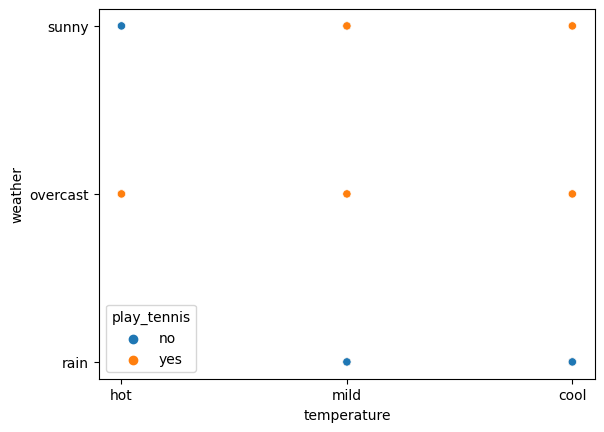

In [22]:
# Exploring our new NOPrediction dataset
# Call scatterplot() on our Seaborn object sns, and plug in y="weather", x= "temperature", hue = "play_tennis", data =NOPrediction.
sns.scatterplot(y="weather", x= "temperature", hue = "play_tennis", data=NOPrediction)


<AxesSubplot:xlabel='wind', ylabel='humidity'>

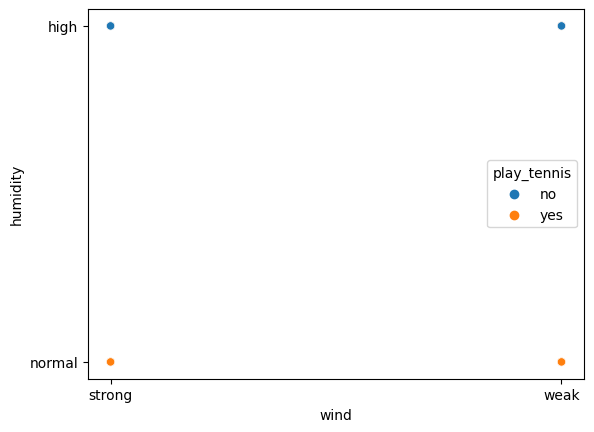

In [23]:
# Call scatterplot() on our Seaborn object sns, and plug in y="humidity", x= "wind", hue = "play_tennis", data =NOPrediction.
sns.scatterplot(y="humidity", x= "wind", hue = "play_tennis", data=NOPrediction)

### 3. Get the subset of tennis data with null values in the play_tennis column, and save that subset as Prediction

In [24]:
# Get just those rows whose value for the Decision column is null.
# Store the result in a variable called Prediction 
# Call a head() on the result to see it's worked out alright

Prediction = tennis[pd.isnull(tennis["play_tennis"])]
Prediction.head()

,weather,temperature,humidity,wind,play_tennis
0,sunny,hot,low,no,NaN


In [25]:
# Call describe() on Prediction
Prediction.describe()

,weather,temperature,humidity,wind,play_tennis
count,1,1,1,1,0
unique,1,1,1,1,0
top,sunny,hot,low,no,NaN
freq,1,1,1,1,NaN


### 4. Divide the NOPrediction subset into X and y

In [26]:
# First of all, let's check the names of the columns of NOPrediction
NOPrediction.columns

Index(['weather', 'temperature', 'humidity', 'wind', 'play_tennis'], dtype='object')

In [50]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "play_tennis"; that is:
# ["weather", "temperature", "humidity", "wind"]
features = ['weather', 'temperature', 'humidity', 'wind']


# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NOPrediction[features]

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NOPrediction.play_tennis

### 5. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [51]:
# Call train_test_split on X, y, test_size = 0.2, and random_state = 0
# Make new variables called X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.2,
                                                  random_state = 0)

### 6. Create dummy variables to deal with categorical inputs

In [52]:
# One-hot encoding all features in training set.
# Call get_dummies() on our Pandas object pd, and pass X_train to it. Reassign the result back to X_train. 
X_train = pd.get_dummies(X_train)

# Do the same, but for X_test
X_test = pd.get_dummies(X_test)

# 3. Modelling
## Model 1: Entropy model - no max_depth
The implemntation code with **ID3 Algorithm** with entropy mode:

In [59]:
# Declare a variable called entropy_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entropy_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

# Call fit() on entropy_model, and pass in X_train and y_train, in that order 
entropy_model.fit(X_train, y_train)

# Call predict() on entropy_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entropy_model.predict(X_test)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entropy_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

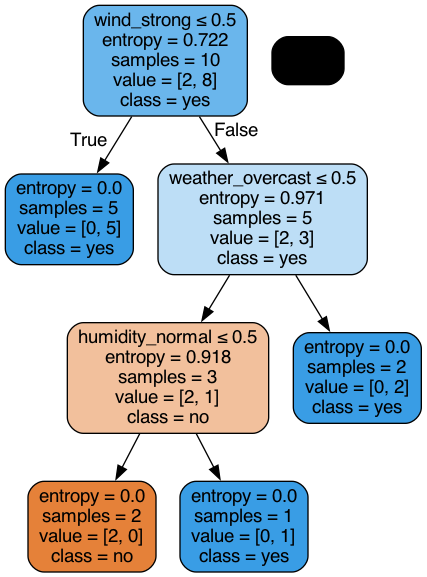

In [65]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entropy_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Model 1: Entropy model - no max_depth: Interpretation and evaluation for the tennis data

In [67]:
# The code in this block will generate model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "yes"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "no"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "no"))

Model Entropy - no max depth
Accuracy: 0.3333333333333333
Balanced accuracy: 0.5
Precision score for "Yes" 0.3333333333333333
Precision score for "No" 0.0
Recall score for "Yes" 1.0
Recall score for "No" 0.0


/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 